In [1]:
import pandas as pd 
observation=pd.read_csv("observation1.csv",sep=";")
import numpy as np
import warnings
warnings.filterwarnings('ignore')
print(type(observation)) 
print(observation.head()) 

<class 'pandas.core.frame.DataFrame'>
   observation         pays  natal    urb
0            1       canada   55.0   16.2
1            2  costa rica    27.3   30.5
2            3         cuba   33.3   16.9
3            4          usa    NaN   16.0
4            5  el salvador   11.5  102.2


 # description de data


In [2]:
observation.describe()

,observation,natal,urb
count,10.00000,7.000000,10.000000
mean,5.50000,31.185714,36.760000
std,3.02765,15.524435,25.218432
min,1.00000,11.500000,16.000000
25%,3.25000,20.600000,19.750000
50%,5.50000,33.100000,32.200000
75%,7.75000,38.750000,40.575000
max,10.00000,55.000000,102.200000


# histogramme

In [3]:
import matplotlib.pyplot as plt
def Histogram_urb (observation=observation):
    plt.style.use('ggplot')
    plt.hist(observation['urb'],rwidth=0.5,bins=13)    
    plt.show()

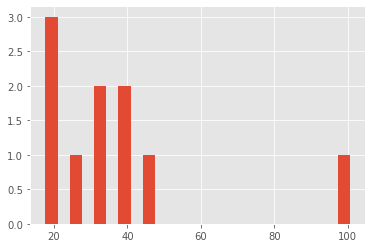

In [4]:
Histogram_urb()

In [5]:
import seaborn as sns   
def DensityPlot(observation=observation):
    plt.style.use('ggplot') 
    sns.distplot(a=observation.urb,hist=False)  
    plt.show()       

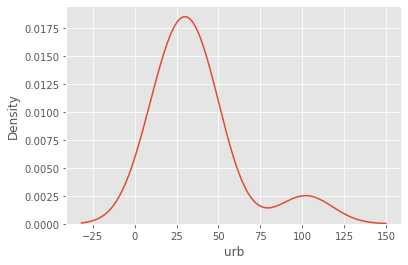

In [6]:
DensityPlot()

# boxplot

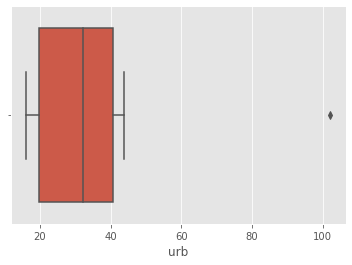

In [7]:
sns.boxplot(x=observation["urb"])
plt.show()

# trouver q1 

In [8]:
q1=observation["urb"].quantile(q=0.25)


# trouver q3

In [9]:
q3=observation["urb"].quantile(q=0.75)


# affichage de q1 et q3 

In [10]:
q1

19.75

In [11]:
q3

40.574999999999996

# trouver iqr et afficher

In [12]:
IQR=q3-q1


In [13]:
IQR

20.824999999999996

# borne inf + sub + outliers

In [14]:
borne_inf = q1-1.5*IQR


In [15]:
borne_sup = q3 +1.5*IQR


In [16]:
borne_inf

-11.487499999999994

In [17]:
borne_sup

71.81249999999999

In [18]:
outlier= observation[(observation["urb"]>borne_sup)  |  (observation["urb"]<borne_inf)]

In [19]:
outlier

,observation,pays,natal,urb
4,5,el salvador,11.5,102.2


In [20]:
outlier.index[0]

4

In [21]:
observation.drop(outlier.index[0])

,observation,pays,natal,urb
0,1,canada,55.0,16.2
1,2,costa rica,27.3,30.5
2,3,cuba,33.3,16.9
3,4,usa,NaN,16.0
5,6,guatemala,NaN,38.4
6,7,haiti,13.9,41.3
7,8,honduras,NaN,43.9
8,9,jamaique,33.1,28.3
9,10,Mexique,44.2,33.9


# imputation par KNN

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
label=LabelEncoder()
observation['pays']=label.fit_transform(observation['pays'])
observation


,observation,pays,natal,urb
0,1,1,55.0,16.2
1,2,2,27.3,30.5
2,3,3,33.3,16.9
3,4,9,NaN,16.0
4,5,4,11.5,102.2
5,6,5,NaN,38.4
6,7,6,13.9,41.3
7,8,7,NaN,43.9
8,9,8,33.1,28.3
9,10,0,44.2,33.9


In [23]:
imputer = KNNImputer(n_neighbors=2)
imp=imputer.fit_transform(observation)
imp

array([[  1.  ,   1.  ,  55.  ,  16.2 ],
       [  2.  ,   2.  ,  27.3 ,  30.5 ],
       [  3.  ,   3.  ,  33.3 ,  16.9 ],
       [  4.  ,   9.  ,  44.15,  16.  ],
       [  5.  ,   4.  ,  11.5 , 102.2 ],
       [  6.  ,   5.  ,  29.05,  38.4 ],
       [  7.  ,   6.  ,  13.9 ,  41.3 ],
       [  8.  ,   7.  ,  29.05,  43.9 ],
       [  9.  ,   8.  ,  33.1 ,  28.3 ],
       [ 10.  ,   0.  ,  44.2 ,  33.9 ]])

# z_score

In [24]:
from sklearn.preprocessing import StandardScaler


In [25]:
nouveau=observation[['natal','urb']]
nouveau
from scipy.stats import zscore

In [26]:
observation = pd.DataFrame(imp, columns = ['observation','pays','natal','urb'])
nouvelletable=observation[['natal','urb']]
nouvelletable

,natal,urb
0,55.00,16.2
1,27.30,30.5
2,33.30,16.9
3,44.15,16.0
4,11.50,102.2
5,29.05,38.4
6,13.90,41.3
7,29.05,43.9
8,33.10,28.3
9,44.20,33.9


In [27]:
nouvelletable=zscore(nouvelletable)

In [28]:
display(nouvelletable)

,natal,urb
0,1.805134,-0.859377
1,-0.374086,-0.261659
2,0.097947,-0.830118
3,0.951540,-0.867737
4,-1.617107,2.735294
5,-0.236410,0.068550
6,-1.428294,0.189765
7,-0.236410,0.298441
8,0.082212,-0.353615
9,0.955474,-0.119544


# k_means

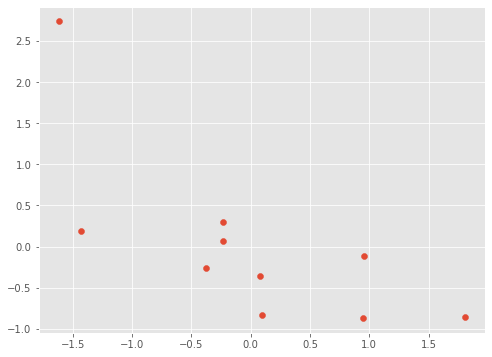

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(nouvelletable.natal, nouvelletable.urb)
plt.show()

In [30]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters = 2)

model=kmeans.fit(nouvelletable)

[[ 0.17967859 -0.30392151]
 [-1.61710728  2.7352936 ]]


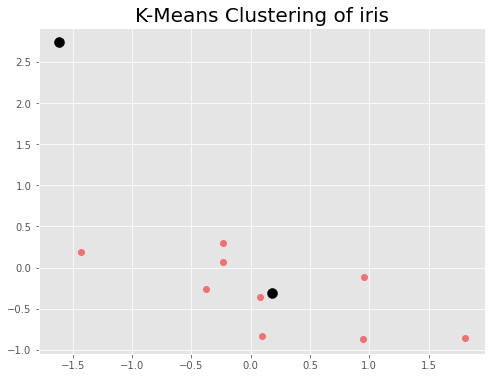

In [32]:
colors=["red"]
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)):
    plt.scatter(nouvelletable[model.labels_==i].natal, nouvelletable[model.labels_==i].urb, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
print(model.cluster_centers_)
plt.title("K-Means Clustering of iris",size=20)
plt.show()